In [11]:
def q0Func(x: float) -> float:
    y = -0.01*(x-80)*(x-80)+1
    if y < 0:
        return 0
    return y

In [12]:
import math
hx = 1 # Шаг по пространству
ht = 0.1 # Шаг по времени
N = 100 # Количество шагов сетки
T = 100 # Конечная точка по времени
u = -0.5 # Скорость

layersCount = math.ceil(T / ht)

precise = [q0Func(i*hx) for i in range(N)]
leftDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 2 layers
centerDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 2 layers
cabaret = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 3 layers
weightedDif = [[0.0 for x in range(N+1)] for l in range(layersCount)] # 3 layers

times = [layer*ht for layer in range(layersCount)]


leftDif[0] = centerDif[0] = cabaret[0] = weightedDif[0] = [q0Func(i*hx) for i in range(N+1)]

In [13]:
# 2-layered
for layer in range (1, layersCount):
    for i in range (1, N):
        layerPre = leftDif[layer-1][i-1]
        if u < 0:
            layerPre = leftDif[layer-1][i+1]
            
        leftDif[layer][i] = leftDif[layer-1][i] - (abs(u) * ht)* (leftDif[layer-1][i]-layerPre)/hx
        centerDif[layer][i] = centerDif[layer-1][i] - 0.5*(u * ht)* (centerDif[layer-1][i+1]-centerDif[layer-1][i-1])/hx


# For 3 layered shemes calc 1st layer
cabaret[1] = [q0Func(i*hx) for i in range(N+1)]
weightedDif[1] = [q0Func(i*hx) for i in range(N+1)]

for layer in range(2, layersCount):
    for i in range (1, N):
        cabaret[layer][i] = cabaret[layer-1][i]-(cabaret[layer-1][i-1]-cabaret[layer-2][i-1])-2*abs(u)*ht*(cabaret[layer-1][i]-cabaret[layer-1][i-1])/hx
        weightedDif[layer][i] = weightedDif[layer-1][i]- 0.5*(weightedDif[layer-1][i-1]-weightedDif[layer-2][i-1])-0.25*abs(u)*ht*(weightedDif[layer-1][i+1]+4*weightedDif[layer-1][i]-5*weightedDif[layer-1][i-1])/hx
        if u < 0:
            cabaret[layer][i] = cabaret[layer-1][i]-(cabaret[layer-1][i+1]-cabaret[layer-2][i+1])-2*abs(u)*ht* (cabaret[layer-1][i]-cabaret[layer-1][i+1])/hx
            weightedDif[layer][i] = weightedDif[layer-1][i]- 0.5*(weightedDif[layer-1][i+1]-weightedDif[layer-2][i+1])-0.25*abs(u)*ht*(weightedDif[layer-1][i-1]+4*weightedDif[layer-1][i]-5*weightedDif[layer-1][i+1])/hx
        

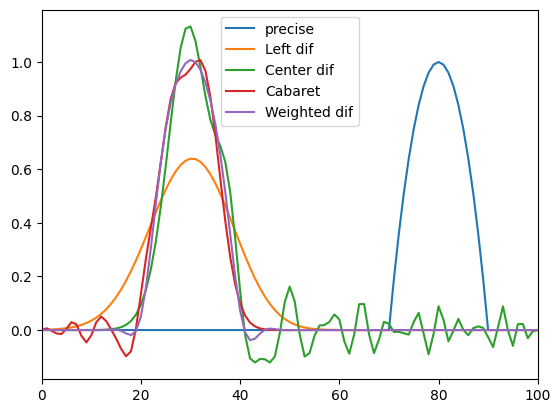

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(precise, label="precise")
ax.plot(leftDif[layersCount-1], label=f"Left dif")
ax.plot(centerDif[layersCount-1], label=f"Center dif")
ax.plot(cabaret[layersCount-1], label=f"Cabaret")
ax.plot(weightedDif[layersCount-1], label=f"Weighted dif")
ax.set_xbound(0, hx*N)
# ax.set_ybound(0, 1)

plt.legend()
plt.show()